# Introduction
In this notebook I will try to answer some questions about suicides all around the world.<br> Link to the dataset: <a href = 'https://www.kaggle.com/datasets/russellyates88/suicide-rates-overview-1985-to-2016'>https://www.kaggle.com/datasets/russellyates88/suicide-rates-overview-1985-to-2016</a>
### Content:
   1) [Data Preprocessing](#Data_Preprocessing)
       - [Loading and checking the data](#Load_check)
       - [Variable Description](#Des)
       - [Data Cleaning](#Clean)
   2) [EDA](#Gen_Analysis)
       - [Analysing the general trend for the entire period of time](#Overall)
       - [Realtionship of suicide rate with age group, generation and sex](#age_sex_gen)<br>
           - [Sex](#sex)<br>
           - [Age](#age)<br>
           - [Generation](#gen)<br>
       - [The highest suicide rate for the 100,000 population for all countries, for the entire time period](#per100k)
       - [Distribution of the suicide rate for all countries from 1985-2015](#World)
       - [Dependency between level of GDP per person and suicide rate](#GDP)
   3) [Conclusions](#Conclusions)
      

## Data Preprocessing
<a id='Data_Preprocessing'></a>

In [332]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [324]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode,iplot
import plotly.io as pio
import math
sns.set_style('darkgrid')
init_notebook_mode(connected=True)
cf.go_offline()

### Loading and checking the data 
<a id='Load_check'></a>

In [4]:
suicides_data = pd.read_csv('master.csv')
suicides_data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [5]:
suicides_data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In this dataset we have only 8364 records for HDI beacuse this metric was created in 1990

URL: <a href='https://en.wikipedia.org/wiki/Human_Development_Index'>https://en.wikipedia.org/wiki/Human_Development_Index</a>

In [6]:
suicides_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


### Variable Description
<a id='Des'></a>
- __country__ : place where suicides happend
- __year__: whn the suicide happend
- __sex__: gender of the person, who commited suicide
- __age__: age group
- __suicide_no__: number of all suicides happened
- __population__: the population of the country
- __HDI for year__: Human development Index
- __gdp_for_year__: the total monetary or market value of all the finished goods and services produced within a country's borders in a year 
- __gdp_per_capita__: the same as previous but divided on population
- __generation__:
    - G.I Generation(Greatest Generation):1901-1927
    - Silient:1928-1945
    - Boomers:1946-1964
    - Generation X:1965-1980
    - Millenials(Generation Y):1981-1996
    - Generation Z:1997-2016

### Data cleaning 
<a id='Clean'></a>

In [7]:
suicides_data['HDI for year'].isnull().sum()

19456

In [8]:
# As you can see most of the data in 'HDI for year' is null, so we can delete it
suicides_data.drop('HDI for year',inplace=True,axis=1)

In [9]:
#Now we will check the number of records for each year
suicides_data.groupby('year').size()

year
1985     576
1986     576
1987     648
1988     588
1989     624
1990     768
1991     768
1992     780
1993     780
1994     816
1995     936
1996     924
1997     924
1998     948
1999     996
2000    1032
2001    1056
2002    1032
2003    1032
2004    1008
2005    1008
2006    1020
2007    1032
2008    1020
2009    1068
2010    1056
2011    1032
2012     972
2013     960
2014     936
2015     744
2016     160
dtype: int64

In [10]:
#So we can delete all data from 2016, because we have small quantity of records from this year
suicides_data_without_2016 = suicides_data[suicides_data['year']!=2016]

In [12]:
# Also we can see that for each year we have different quantity of records, so from this we can make conclusion,
# that we have diferent number of countries for each year, so we need to create another dataframe for analyses, that 
# will be based on all period of time(1985-2015)
num_rec_for_each_country = suicides_data_without_2016.groupby('country').size()
country_with_all_records = num_rec_for_each_country[num_rec_for_each_country==num_rec_for_each_country.max()].index
row_with_all_records = suicides_data_without_2016['country'].map(lambda x: True if x in list(country_with_all_records) else False)
df_records_for_each_year_and_coun = suicides_data_without_2016[row_with_all_records]
df_records_for_each_year_and_coun = df_records_for_each_year_and_coun.reset_index(drop=True)
df_records_for_each_year_and_coun

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Argentina,1985,male,75+ years,202,363000,55.65,Argentina1985,"88,416,668,900",3264,G.I. Generation
1,Argentina,1985,male,55-74 years,485,1997000,24.29,Argentina1985,"88,416,668,900",3264,G.I. Generation
2,Argentina,1985,male,35-54 years,414,3346300,12.37,Argentina1985,"88,416,668,900",3264,Silent
3,Argentina,1985,female,55-74 years,210,2304000,9.11,Argentina1985,"88,416,668,900",3264,G.I. Generation
4,Argentina,1985,male,25-34 years,177,2234200,7.92,Argentina1985,"88,416,668,900",3264,Boomers
...,...,...,...,...,...,...,...,...,...,...,...
8551,United States,2015,female,25-34 years,1444,21555712,6.70,United States2015,"18,120,714,000,000",60387,Millenials
8552,United States,2015,female,15-24 years,1132,21633813,5.23,United States2015,"18,120,714,000,000",60387,Millenials
8553,United States,2015,female,75+ years,540,11778666,4.58,United States2015,"18,120,714,000,000",60387,Silent
8554,United States,2015,male,5-14 years,255,21273987,1.20,United States2015,"18,120,714,000,000",60387,Generation Z


So for analyses that will be connected with all time period, the dataframe 'df_records_for_each_year_and_coun' will be used,
in other analyses dataframe: 'suicides_data_without_2016 ' will be used. In first dataframe we have data about such countries:

In [13]:
pd.DataFrame(country_with_all_records)

,country
0,Argentina
1,Austria
2,Belgium
3,Brazil
4,Chile
5,Colombia
6,Ecuador
7,Greece
8,Iceland
9,Israel


## EDA
<a id='Gen_Analysis'></a>

### Analysing the general trend for the entire period of time
<a id='Overall'></a>

First of all the count of suicides per year will be checked, this plot will show only overall tendency of changing the number of the suicides around the world, because we don\`t have data for all countries for this time period

Text(0.5, 0, 'Year')

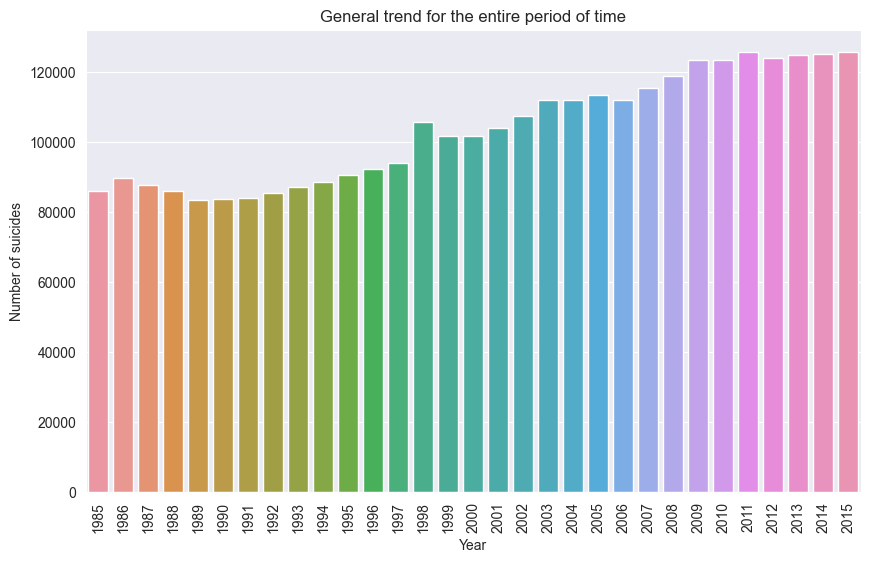

In [102]:
suicides_per_year = df_records_for_each_year_and_coun.groupby('year').sum()['suicides_no']
suicides_per_year_plt = suicides_per_year.reset_index()
plt.figure(figsize=(10,6))
plot = sns.barplot(x='year',y='suicides_no',data = suicides_per_year_plt)
plot.tick_params(axis='x',rotation=90)
plt.title('General trend for the entire period of time')
plt.ylabel('Number of suicides')
plt.xlabel('Year')

From this plot we can see that tendency of number of suicides is growing each year, but we can see big change of number of suicides in 1998, Let\`s find out the reason of this rapid change. Firstly we need to find out the difference between 1998 and 1997 overall and for each country

In [15]:
diff_1997_1998_overall = suicides_per_year.loc[1998] - suicides_per_year.loc[1997]
groupby_year_and_countries = df_records_for_each_year_and_coun.groupby(['year','country'])['suicides_no'].sum()
diff_1997_1998_countries = []
for i in country_with_all_records:
    diff_1997_1998_countries.append(groupby_year_and_countries[1998].loc[i]-groupby_year_and_countries[1997].loc[i])
pd.DataFrame(index = country_with_all_records, data=diff_1997_1998_countries/diff_1997_1998_overall*100,columns = ['Difference']).sort_values(by='Difference',ascending=False)
# The difference in dataframe was shown in percent

,Difference
country,
Japan,70.500000
Republic of Korea,21.939655
Colombia,6.982759
United Kingdom,2.120690
Argentina,1.405172
Chile,1.043103
Puerto Rico,0.413793
United States,0.353448
Mauritius,0.284483


<a id = 'growth'></a>
So, we have found out that the rapid growth of number of suicides in 1998 was connected with the wave of corporate restructuring, which forced employees on once secure career tracks suddenly out of jobs.

<a href = 'https://www.deseret.com/1999/7/3/19453796/suicide-rate-in-japan-surged-35-in-1998'>Source</a>

### Realtionship of suicide rate with age group, generation and sex
<a id='age_sex_gen'></a>

<a id='sex'></a>

<Axes: xlabel='sex', ylabel='suicides/100k pop'>

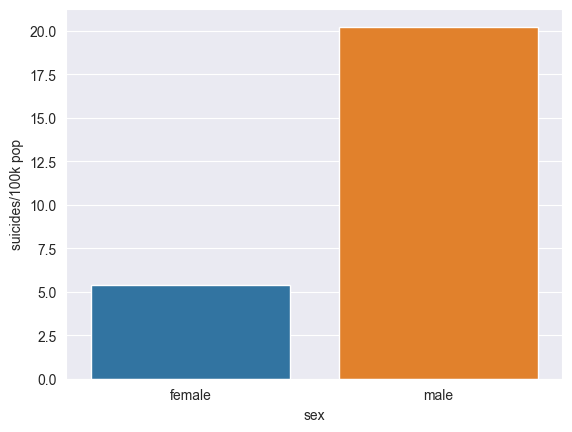

In [101]:
# We will start with observing realationship between sex and suicide rate
sns.barplot(suicides_data_without_2016[['sex','suicides/100k pop']].groupby('sex').mean().reset_index(),y='suicides/100k pop',x='sex')

In [326]:
suicides_rate_sex = suicides_data_without_2016[['year','population','suicides_no','sex']].groupby(['year','sex']).sum()
suicides_rate_sex['suicides per 100k'] = suicides_rate_sex['suicides_no']/suicides_rate_sex['population']*100000
suicides_rate_sex = suicides_rate_sex.reset_index(level = 1)
suicides_rate_male = suicides_rate_sex[suicides_rate_sex['sex']=='male']
suicides_rate_female = suicides_rate_sex[suicides_rate_sex['sex']=='female']

fig = go.Figure()
fig.add_trace(go.Scatter(x = suicides_rate_male.index.get_level_values('year'),
                         y = suicides_rate_male['suicides per 100k'],
                        mode = 'lines+markers',
                         name = 'Male'
                        ))
fig.add_trace(go.Scatter(x = suicides_rate_female.index.get_level_values('year'),
                         y = suicides_rate_female['suicides per 100k'],
                        mode = 'lines+markers',
                         name = 'Female'
                        ))
fig.update_traces(hoverinfo="all", hovertemplate="Year: %{x}<br>Suicides per 100k: %{y}")
pio.write_html(fig,file='Male_Female_lineplot',auto_open=True)
fig.show()

<a id='ins_sex'></a>

Here we can see that men on average commit 4 times more suicides than women. But I need to mention thar women are even more likely to attempt suicide but male suicide methods are often more violent, making them more likely to be completed before anyone can intervene.

<a href = 'https://www.bbc.com/future/article/20190313-why-more-men-kill-themselves-than-women'>Source #1</a> </br>
<a href = 'https://en.wikipedia.org/wiki/Gender_differences_in_suicide'>Source #2</a> </br>
Now let\`s try to see changes in suicides rate of men and women during all time period

<a id='age'></a>

<Axes: xlabel='age', ylabel='suicides per 100k'>

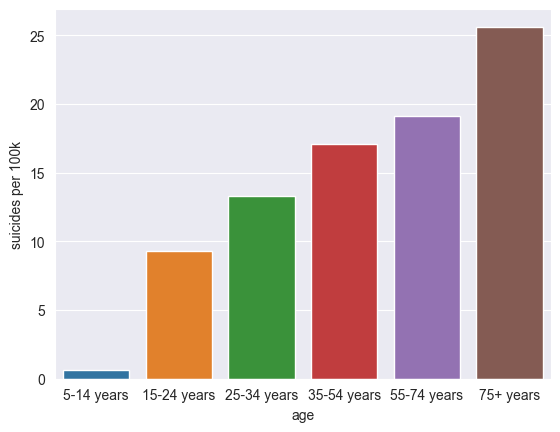

In [161]:
# Let`s continue with the relationship of the age group and suicide rate
suicide_rate_age_group_year = suicides_data_without_2016[['year','age','population','suicides_no']].groupby(['year','age']).sum()
suicide_rate_age_group_year['suicides per 100k'] = suicide_rate_age_group_year['suicides_no']/suicide_rate_age_group_year['population']*100000
suicide_rate_age_group = suicide_rate_age_group_year.reset_index(level = 1)
suicide_rate_age_group = suicide_rate_age_group.groupby('age').mean()
suicide_rate_age_group.reset_index(inplace = True)
sns.barplot(data=suicide_rate_age_group.sort_values(by = 'suicides per 100k'),x='age',y = 'suicides per 100k')

In [328]:
suicide_rate_age_group_year_new_index = suicide_rate_age_group_year.reset_index(level = 1)
plot = go.Figure()
for i in suicide_rate_age_group_year.index.get_level_values('age').unique():
    plot.add_trace(go.Scatter(x = suicide_rate_age_group_year.index.get_level_values('year').unique(),
                              y = suicide_rate_age_group_year_new_index[suicide_rate_age_group_year_new_index['age']==i]['suicides per 100k'],
                             mode = 'lines+markers',
                             name = i ))
plot.update_traces(hoverinfo="all", hovertemplate="Year: %{x}<br>Suicides per 100k: %{y}")
pio.write_html(plot,file='Age_lineplot',auto_open=True)
plot.show()

<a id = 'ins_year'></a>
From this section we can make 2 conclusions:</br>
   - Firstly, age group '75+ years' has the biggest rate of suicides compared to other groups, this can be caused with next         reasons:</br>
        - Loss of the close partner, which can be trigger for suicide</br>
        - Loneliness</br>
   - Secondly, the rapid growth of rate between '5-14' years and '15-24 years' is observed, this is also connected with</br>             several factors:</br>
        - Academic failure</br>
        - Being arrested or imprisoned</br>
        - Bullying, shaming, or humiliation, including cyberbullying</br>
        - Financial problems</br>
        - End of a close friendship or romantic relationship</br>
        - Job loss</br>
        - Loss of friends or family acceptance due to revealing your sexual orientation</br>
        - Loss of social status</br>
    

<a id='gen'></a>

<Axes: xlabel='generation', ylabel='suicides per 100k'>

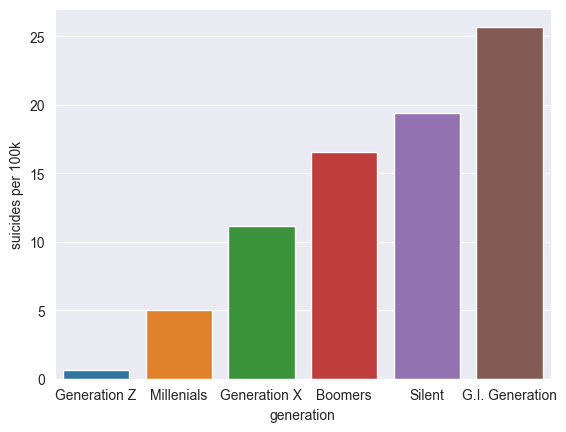

In [202]:
#And last in this section but not least is realtionship between generations and suicide rates
suicide_rate_generation_and_year = suicides_data_without_2016[['year','generation','population','suicides_no']]\
                                                            .groupby(['year','generation']).sum()
suicide_rate_generation_and_year['suicides per 100k'] = suicide_rate_generation_and_year['suicides_no']/\
                                                        suicide_rate_generation_and_year['population']*100000
suicide_rate_generation = suicide_rate_generation_and_year.reset_index(level = 1)
suicide_rate_generation = suicide_rate_generation[['generation','suicides per 100k']].groupby('generation').mean()
sns.barplot(data=suicide_rate_generation.reset_index().sort_values(by = 'suicides per 100k'),x = 'generation',y='suicides per 100k')

In [329]:
df_for_plot_gen = suicide_rate_generation_and_year.reset_index(level = 1)
plot = go.Figure()
for i in df_for_plot_gen['generation'].unique():
    df_for_each_gen = df_for_plot_gen[df_for_plot_gen['generation']==i]
    plot.add_trace(go.Scatter(x = df_for_each_gen.index.get_level_values('year'),
                                y = df_for_each_gen['suicides per 100k'],
                                 mode = 'lines+markers',
                                 name = i))
plot.update_traces(hoverinfo="all", hovertemplate="Year: %{x}<br>Suicides per 100k: %{y}")
pio.write_html(fig,file='Generation_lineplot',auto_open=True)
plot.show()

<a id='ins_gen'></a>
From this plots we can make several conclusions:
   - First of all, commitment of suicides is decreasing for each of generation, this can tell us that problem of</br>
      is becoming more important for society, and more resources are directed for solving this problem
   - The highest level os suicide commitment is observed in G. I. genaration in 1991, I suppose that it is connected with the age</br> this generation on that time (the youngest from this generation was about 64 and the oldest one - 90 years old)

### The highest suicide rate for the 100,000 population for all countries, for the entire time period
<a id='per100k'></a>

In [16]:
# pd.DataFrame(suicides_data_without_2016.groupby('country-year').sum()['suicides/100k pop'].sort_values(ascending=False))
df = suicides_data_without_2016.groupby('country-year').sum()[['suicides_no','population']]
df['per100k'] = df.apply(lambda x: x['suicides_no']/x['population']*100000 if x['suicides_no'] != 0 else 0,axis=1)
df.sort_values(by='per100k',ascending=False)[:10]

,suicides_no,population,per100k
country-year,,,
Lithuania1996,1722,3375163,51.019758
Lithuania1995,1694,3387149,50.012562
Lithuania2000,1631,3315125,49.198748
Lithuania1997,1632,3364273,48.509737
Lithuania2002,1551,3274488,47.366184
Lithuania2001,1533,3294138,46.537212
Lithuania1999,1550,3333452,46.498345
Lithuania1998,1553,3350973,46.344748
Lithuania2003,1455,3254127,44.712453


<a id='ins_lit'></a>
So we have seen, that first 9 places is Lithuania, their rate is so high because of next reasons: 

    - The sun does not shine.
    - The weather is rainy.
    - High alcohol consumption.

### Distribution of the suicide rate for all countries from 1985-2015
<a id='World'></a>

In [330]:
suicides_rate_per_country = suicides_data_without_2016[['year','country','population','suicides_no']].groupby(['year','country']).sum()
suicides_rate_per_country['suicides per 100k'] = suicides_rate_per_country['suicides_no']/suicides_rate_per_country['population']*100000
suicides_specific_year = suicides_rate_per_country.loc[2000]
plot = px.choropleth(suicides_rate_per_country.reset_index(), 
                    hover_data=['suicides per 100k','suicides_no','country','population','year'],
                    locations='country',
                    color="suicides per 100k",
                    locationmode="country names",
                    animation_frame='year')
plot.update_layout(height = 600, margin={"r":0,"t":50,"l":0,"b":0})
pio.write_html(plot,file='Animated_Map',auto_open=True)
plot.show()

### Dependency between level of GDP per person and suicide rate
<a id='GDP'></a>

In [321]:
dep_gdp_suicide_rate = suicides_data_without_2016[['country','year','gdp_per_capita ($)']].groupby(['country','year']).mean()
dep_gdp_suicide_rate[['population','suicides_no']] = suicides_data_without_2016[['country','year','gdp_per_capita ($)','population','suicides_no']].groupby(['country','year']).sum()[['population','suicides_no']]
dep_gdp_suicide_rate['suicides per 100k'] = dep_gdp_suicide_rate['suicides_no']/dep_gdp_suicide_rate['population']*100000
dep_gdp_suicide_rate

gdp_per_capita ($)  population  suicides_no  \
country    year                                                
Albania    1987               796.0     2709600           73   
           1988               769.0     2764300           63   
           1989               833.0     2803100           68   
           1992               251.0     2822500           47   
           1993               437.0     2807300           73   
...                             ...         ...          ...   
Uzbekistan 2010              1533.0    25651783         1464   
           2011              1767.0    25978049         1640   
           2012              1964.0    26381830         1835   
           2013              2150.0    26838924         1950   
           2014              2309.0    27313507         2095   

                 suicides per 100k  
country    year                     
Albania    1987           2.694125  
           1988           2.279058  
           1989           2.425886  
           1992           1.665190  
           1993           2.600363  
...                            ...  
Uzbekistan 2010           5.707206  
           2011           6.313022  
           2012           6.955545  
           2013           7.265567  
           2014           7.670198  

[2305 rows x 4 columns]

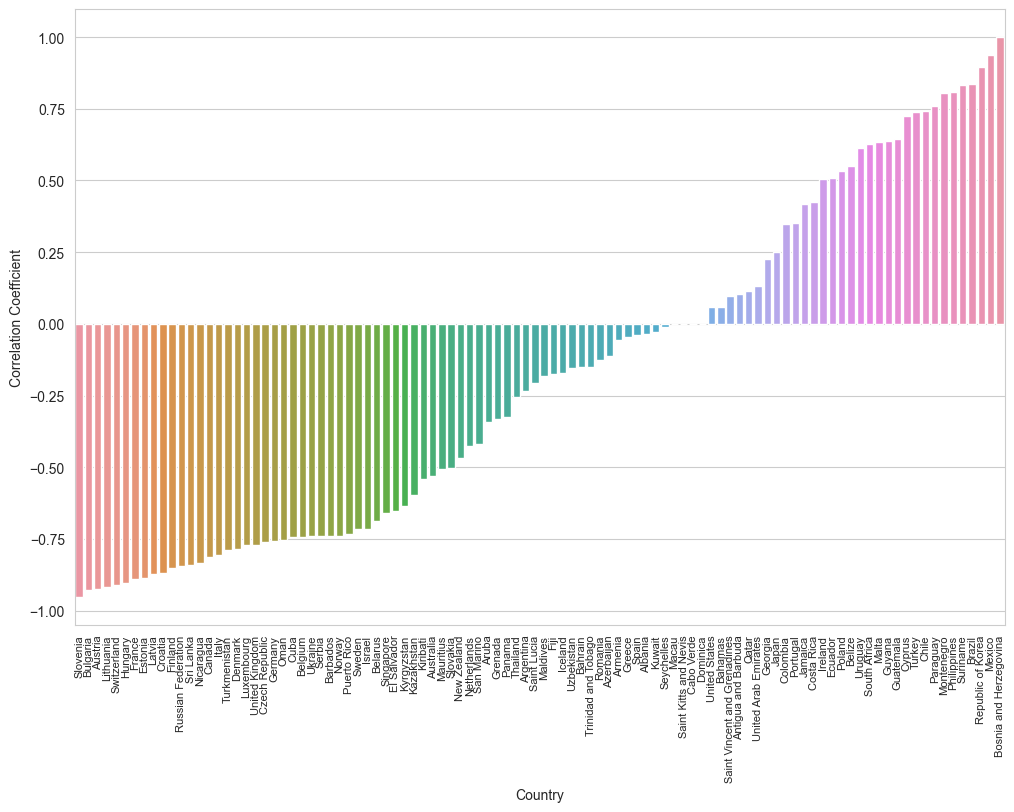

In [33]:

corr_gdp_suicide_rate=pd.DataFrame(columns=['Country','Correlation Coefficient'])
for i in suicides_data_without_2016['country'].unique():
        corr_gdp_suicide_rate = corr_gdp_suicide_rate._append({'Country':i,'Correlation Coefficient': dep_gdp_suicide_rate.loc[i].corr().iloc[0,-1]},
                                                              ignore_index=True)
plt.figure(figsize=(12,8))
corr_gdp_suicide_rate['Correlation Coefficient']=corr_gdp_suicide_rate['Correlation Coefficient'].map(lambda x: 0 if math.isnan(x) else x)
plot = sns.barplot(data = corr_gdp_suicide_rate.sort_values(by= 'Correlation Coefficient',ascending=True),
            y='Correlation Coefficient',
            x = 'Country')
plot.tick_params(axis = 'x',rotation = 90,labelsize = 8)

So we can observe that lots of countries have negative correlation between suicide rate and gdp per capita, whic is logic. But we have countries that have positive correlation between this two indicators. Let\`s try to add these countries on a map and try to find out the the reason for this

In [331]:
data_for_plot = dict(type = 'choropleth',
                    locations = corr_gdp_suicide_rate['Country'],
                    z = corr_gdp_suicide_rate['Correlation Coefficient'],
                     locationmode = "country names",
                    colorbar = {'title':'Correlation between<br> suicides rate and <br>GDP per capita'})
layout_for_plot = dict(title = 'Correlation between suicides rate and GDP per capita',
              geo = dict(
                    showframe = False,
                    projection = {'type':'natural earth'}
                        ))

plot = go.Figure(data = [data_for_plot],layout = layout_for_plot)
plot.update_layout(height = 600, margin={"r":0,"t":50,"l":0,"b":0})
iplot(plot,validate=False)
pio.write_html(plot,file='Map_corr_map',auto_open=True)

## Conclusions
<a id='Conclusions'></a>
I will outline the main insights from this EDA:
   - [Rapid Growth of the suicide rate in 1998](#growth)
   - [Relationship between sex and suicide rate](#ins_sex)
   - [High suicide rate in old people and quick growth of the suicide rate in the period 15-24 years](#ins_year)
   - [Decreasing of suicide commitment based on the genereation](#ins_gen)
   - [The reason of high level of suicide rate in Lithuania](#ins_lit)